In [21]:
#importing  packages
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from PIL import Image
import csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#Loading dataset from drive
train_file=open("/content/drive/MyDrive/Mnist Digit Recogination/mnist_test.csv","r")
test_file=open("/content/drive/MyDrive/Mnist Digit Recogination/mnist_train.csv","r")
test=test_file.readlines()
train=train_file.readlines()

In [23]:
#Activation Functions and important functions
def sigmoid(x, derivative=False):
      if derivative:
          return (np.exp(-x))/((np.exp(-x)+1)**2)
      return 1/(1 + np.exp(-x))
#softmax activation function
def softmax(x, derivative=False):
  # Numerically stable with large exponentials
  exps = np.exp(x - x.max())
  if derivative:
    return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
  return exps / np.sum(exps, axis=0)
# function for feed forward
def feed_forward(inputs):
  # input layer activations becomes sample
  l0 = inputs

  # input layer to hidden layer 1
  a1 = np.dot(w1,l0)
  l1 = sigmoid(a1)
  # hidden layer 1 to hidden layer 2
  a2 = np.dot(w2, l1)
  l2 = sigmoid(a2)
  # hidden layer 2 to output layer
  a3 = np.dot(w3,l2)
  l3 = softmax(a3)
  return l3

#function for calculation accuracy
def compute_accuracy(test_data, output_nodes):
      predictions = []

      for x in train[1:]:
          all_values = x.split(',')
          # scale the data
          inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
          # create the target output values (all 0.01, except the desired label which is 0.99)
          targets = np.zeros(output_nodes) + 0.01
          # all_values[0] is the target label for this record
          targets[int(all_values[0])] = 0.99


          output = feed_forward(inputs)

          pred = np.argmax(output)
          predictions.append(pred == np.argmax(targets))

      return np.mean(predictions)


In [ ]:

sizes = [784,128,64,10]
epochs = 300
lr = 0.01
acc=[]
# number of nodes in each layer
input_layer=sizes[0]
hidden_1=sizes[1]
hidden_2=sizes[2]
output_layer=sizes[3]

w1=np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1)
w2=np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2)
w3=np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
for iteration in range(epochs):
  for x in train[1:]:
    all_values = x.split(',')
    # scale the inputs
    inputs = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(10) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99


    # input layer activations becomes sample
    l0 = inputs

    # input layer to hidden layer 1
    a1 = np.dot(w1,l0)

    l1 = sigmoid(a1)

    # hidden layer 1 to hidden layer 2
    a2 = np.dot(w2, l1)
    l2 = sigmoid(a2)

    # hidden layer 2 to output layer
    a3 = np.dot(w3,l2)
    l3 = softmax(a3)

    output = l3



    #backward pass
    change_w = {}

    # Calculate W3 update
    error = 2 * (output - targets) / output.shape[0] * softmax(a3, derivative=True)
    change_w['w3'] = np.outer(error, l2)

    # Calculate W2 update
    error = np.dot(w3.T, error) * sigmoid(a2, derivative=True)
    change_w['w2'] = np.outer(error, l1)

    # Calculate W1 update
    error = np.dot(w2.T, error) * sigmoid(a1, derivative=True)
    change_w['w1'] = np.outer(error, l0)

    #updating weights
    w1=w1-lr*change_w['w1']
    w2=w2-lr*change_w['w2']
    w3=w3-lr*change_w['w3']





  accuracy = compute_accuracy(test, 10)
  acc.append(accuracy)
  print('Epoch: {0}, Accuracy: {1:.2f}%'.format(iteration+1, accuracy * 100))



Epoch: 1, Accuracy: 27.24%
Epoch: 2, Accuracy: 39.36%
Epoch: 3, Accuracy: 42.96%
Epoch: 4, Accuracy: 43.77%
Epoch: 5, Accuracy: 44.46%
Epoch: 6, Accuracy: 45.30%
Epoch: 7, Accuracy: 46.26%
Epoch: 8, Accuracy: 46.98%
Epoch: 9, Accuracy: 47.84%
Epoch: 10, Accuracy: 48.76%
Epoch: 11, Accuracy: 49.80%
Epoch: 12, Accuracy: 50.83%
Epoch: 13, Accuracy: 51.98%
Epoch: 14, Accuracy: 52.77%
Epoch: 15, Accuracy: 53.68%
Epoch: 16, Accuracy: 54.49%
Epoch: 17, Accuracy: 55.36%
Epoch: 18, Accuracy: 56.32%
Epoch: 19, Accuracy: 57.57%
Epoch: 20, Accuracy: 59.11%
Epoch: 21, Accuracy: 60.74%
Epoch: 22, Accuracy: 62.45%
Epoch: 23, Accuracy: 64.10%
Epoch: 24, Accuracy: 66.27%
Epoch: 25, Accuracy: 67.88%
Epoch: 26, Accuracy: 69.46%
Epoch: 27, Accuracy: 70.50%
Epoch: 28, Accuracy: 71.69%
Epoch: 29, Accuracy: 72.72%
Epoch: 30, Accuracy: 73.89%
Epoch: 31, Accuracy: 74.74%
Epoch: 32, Accuracy: 74.91%
Epoch: 33, Accuracy: 74.89%
Epoch: 34, Accuracy: 74.70%
Epoch: 35, Accuracy: 74.36%
Epoch: 36, Accuracy: 73.74%
E

In [ ]:
with open('/content/drive/MyDrive/Mnist Digit Recogination/trained_weights(300).pkl', 'wb') as f:
    pkl.dump(w1,f)
    pkl.dump(w2,f)
    pkl.dump(w3,f)
    pkl.dump(acc,f)


In [24]:
with open('/content/drive/MyDrive/Mnist Digit Recogination/trained_weights(300).pkl', 'rb') as f:
    w1=pkl.load(f)
    w2=pkl.load(f)
    w3=pkl.load(f)
    acc=pkl.load(f)


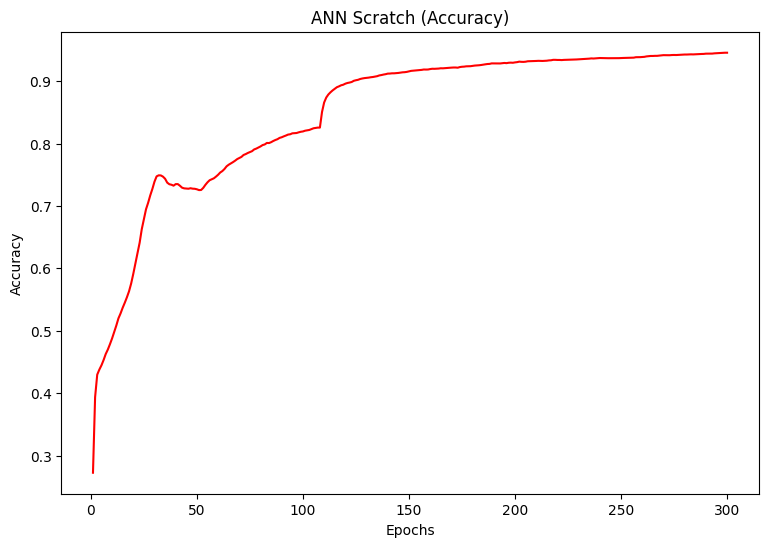

In [25]:
epochs=[]
for i in range (1,301):
  epochs.append(i)
fig=plt.figure(figsize=(9,6))
plt.title("ANN Scratch (Accuracy)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epochs,acc,'r')
fig.savefig('/content/drive/MyDrive/Mnist Digit Recogination/Accuracy(ANN Scratch).png')

Predicted value 5
True value 5


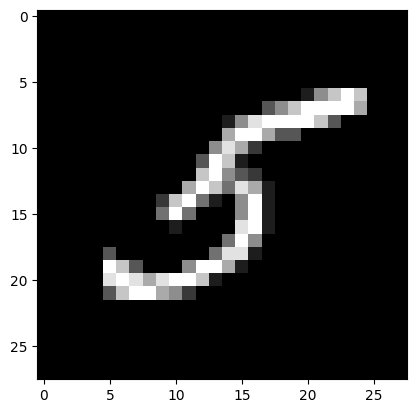

In [27]:
x=test[36]

all_values = x.split(',')
    # scale and shift the inputs


inputs = (np.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
img=inputs.reshape((28,28))
plt.imshow(img,cmap='gray')
targets = np.zeros(10) + 0.01
    # all_values[0] is the target label for this record
targets[int(all_values[0])] = 0.99
    # input layer activations becomes sample
l0 = inputs

    # input layer to hidden layer 1
a1 = np.dot(w1,l0)

l1 = sigmoid(a1)

    # hidden layer 1 to hidden layer 2
a2 = np.dot(w2, l1)
l2 = sigmoid(a2)

    # hidden layer 2 to output layer
a3 = np.dot(w3,l2)
l3 = softmax(a3)
pred = np.argmax(l3)
print("Predicted value",pred)
print("True value",np.argmax(targets))